# US School Analysis

## Start with imports and reading in your data

In [64]:
# Include all your imports here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [65]:
# Load the Public school dataset

ps_data_filepath = Path(r"/Users/benjaminlucas/Shaolin.AI Bootcamp/Homework/4. US Public School Analysis/Starter_Code/Resources/public_school_data.csv")
ps_locations_filepath = Path(r"/Users/benjaminlucas/Shaolin.AI Bootcamp/Homework/4. US Public School Analysis/Starter_Code/Resources/public_school_locations.csv")
ps_dictionary_filepath = Path(r"/Users/benjaminlucas/Shaolin.AI Bootcamp/Homework/4. US Public School Analysis/Starter_Code/Resources/school_data_dictionary.csv")

ps_data_df = pd.read_csv(ps_data_filepath)
ps_locations_df = pd.read_csv(ps_locations_filepath)
ps_dictionary_df = pd.read_csv(ps_dictionary_filepath)

## Data Exploration and Preparation

In [66]:
ps_dictionary_df["Fields"].values

array(['OBJECTID', 'Shape', 'NCESSCH', 'SURVYEAR', 'STABR', 'LEAID',
       'ST_LEAID', 'LEA_NAME', 'SCH_NAME', 'LSTREET1', 'LSTREET2',
       'LCITY', 'LSTATE', 'LZIP', 'LZIP4', 'PHONE', 'CHARTER_TEXT',
       'MAGNET_TEXT', 'VIRTUAL', 'GSLO', 'GSHI', 'SCHOOL_LEVEL', 'TITLEI',
       'STITLEI', 'STATUS', 'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT',
       'ULOCALE', 'NMCNTY', 'TOTFRL', 'FRELCH', 'REDLCH', 'PK', 'KG',
       'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G08', 'G09',
       'G10', 'G11', 'G12', 'G13', 'UG', 'AE', 'TOTMENROL', 'TOTFENROL',
       'TOTAL', 'MEMBER', 'FTE', 'STUTERATIO', 'AMALM', 'AMALF', 'AM',
       'ASALM', 'ASALF', 'AS', 'BLALM', 'BLALF', 'BL', 'HPALM', 'HPALF',
       'HP', 'HIALM', 'HIALF', 'HI', 'TRALM', 'TRALF', 'TR', 'WHALM',
       'WHALF', 'WH', 'LATCOD', 'LONCOD'], dtype=object)

In [67]:
# Use an .isin() function to keep only fields that appear in the main public_school_data.csv.
# Identify the unique id column. In the public_school_data.csv, the unique school ID is 'NCESSCH’. In the public_school_locations.csv, this code is titled 'ID’.
# This NCESSCH code is the assigned school identification code from the National Center for Education Statistics for each school.

ps_dictionary_df = ps_dictionary_df[ps_dictionary_df["Fields"].isin(ps_data_df.columns)]
ps_dictionary_df["Fields"].values


array(['NCESSCH', 'LSTATE', 'SCHOOL_LEVEL', 'SCHOOL_TYPE_TEXT', 'TOTAL',
       'FTE', 'STUTERATIO', 'AM', 'AS', 'BL', 'HP', 'HI', 'TR', 'WH'],
      dtype=object)

In [68]:
# Ensure the column you selected is indeed a unique identifier by checking the number of unique values.
# Compare it to the number of rows in the dataframe.

unique_values = ps_data_df["NCESSCH"].nunique()
total_rows = len(ps_data_df)
print(unique_values)
print(total_rows)

if unique_values == total_rows:
	print(f"The column 'NCESSCH' is a unique identifier. It has {unique_values} unique values and {total_rows} total rows.")
else:
	print(f"The column 'NCESSCH' is NOT a unique identifier. It has {unique_values} unique values and {total_rows} total rows.")


100722
100722
The column 'NCESSCH' is a unique identifier. It has 100722 unique values and 100722 total rows.


In [69]:
# Change the names of the unique ID column in both the location data and public school data to match.
# Set the matching unique school ID column as index in both dataframes.

ps_data_df = ps_data_df.rename(columns={"NCESSCH":"Unique School ID"})
ps_locations_df = ps_locations_df.rename(columns={"ID":"Unique School ID"})

ps_data_df = ps_data_df.set_index("Unique School ID")
ps_locations_df = ps_locations_df.set_index("Unique School ID")



In [70]:
# Check your work

ps_data_df.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH
Unique School ID,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0


In [71]:
# Check your work

ps_locations_df.head()

,LATCOD,LONCOD
Unique School ID,,
10000500870,34.2602,-86.206200
10000500871,34.2622,-86.204900
10000500879,34.2733,-86.220100
10000500889,34.2527,-86.221806
10000501616,34.2898,-86.193300


In [72]:
# Join the location and data dataframes together
# In Pandas, use [ ] to select columns or rows from the data frame.

merged_df = pd.merge(ps_data_df, ps_locations_df, left_index = True, right_index = True, how = "inner")
merged_df.head()




,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
Unique School ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.2602,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.2622,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.2733,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.2527,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.2898,-86.193300


In [73]:
# Get the value counts for the school type column

merged_df["SCHOOL_TYPE_TEXT"].value_counts()


SCHOOL_TYPE_TEXT
Regular school                  91595
Alternative Education School     5588
Special education school         1946
Career and Technical School      1593
Name: count, dtype: int64

In [74]:
# Create a subset of the dataframe that only includes regular schools ensure it was successful by comparing rows in the subset to the value counts above

regular_school_subset = merged_df.loc[merged_df["SCHOOL_TYPE_TEXT"]=="Regular school"]
regular_school_subset.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
Unique School ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.2602,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.2622,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.2733,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.2527,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.2898,-86.193300


In [75]:
# Create an elementary school subset to practice .loc 

elem_school_subset = merged_df.loc[merged_df["SCHOOL_LEVEL"]=="Elementary"]
elem_school_subset.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
Unique School ID,,,,,,,,,,,,,,,
10000500889,AL,Elementary,Regular school,908.0,49.000000,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.252700,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.000000,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.289800,-86.193300
10000502150,AL,Elementary,Regular school,973.0,57.500000,16.92,2.0,4.0,37.0,0.0,553.0,26.0,351.0,34.253300,-86.221800
10000600877,AL,Elementary,Regular school,456.0,19.110001,23.86,1.0,1.0,3.0,1.0,204.0,4.0,242.0,34.176234,-86.321259
10000600880,AL,Elementary,Regular school,229.0,10.160000,22.54,2.0,4.0,2.0,1.0,17.0,1.0,202.0,34.344500,-86.442100


## Data Cleaning and dealing with nulls

In [76]:
# Check for nulls and determine the best approach for dealing with them

merged_df.isnull().sum()

LSTATE                  0
SCHOOL_LEVEL            0
SCHOOL_TYPE_TEXT        0
TOTAL                2071
FTE                  9502
STUTERATIO           1216
AM                  24373
AS                  13828
BL                   8706
HP                  34906
HI                   3698
TR                   6700
WH                   3784
LATCOD                  0
LONCOD                  0
dtype: int64

In [77]:
# Fill some of the columns with 0 where it makes sense
# Code would be: merged_df.fillna(0, inplace=True) BUT woudld replace every null with 0

columns_to_replace = ["AM","AS","BL","HP","HI","TR","WH"]
zero_filled_nulls = merged_df.copy()
zero_filled_nulls.loc[:,columns_to_replace] = zero_filled_nulls.loc[:,columns_to_replace].fillna(0)

In [78]:
# Verify changes to nulls and prepare to drop na

zero_filled_nulls.isnull().sum()

LSTATE                 0
SCHOOL_LEVEL           0
SCHOOL_TYPE_TEXT       0
TOTAL               2071
FTE                 9502
STUTERATIO          1216
AM                     0
AS                     0
BL                     0
HP                     0
HI                     0
TR                     0
WH                     0
LATCOD                 0
LONCOD                 0
dtype: int64

In [79]:
# Drop remaining nulls wher it would make sense

zero_filled_nulls.dropna(inplace=True)

In [80]:
# Verify changes to nulls and no nulls should remain

zero_filled_nulls.isnull().sum()

LSTATE              0
SCHOOL_LEVEL        0
SCHOOL_TYPE_TEXT    0
TOTAL               0
FTE                 0
STUTERATIO          0
AM                  0
AS                  0
BL                  0
HP                  0
HI                  0
TR                  0
WH                  0
LATCOD              0
LONCOD              0
dtype: int64

In [81]:
cleaned_ps_df = zero_filled_nulls
cleaned_ps_df.head()

,LSTATE,SCHOOL_LEVEL,SCHOOL_TYPE_TEXT,TOTAL,FTE,STUTERATIO,AM,AS,BL,HP,HI,TR,WH,LATCOD,LONCOD
Unique School ID,,,,,,,,,,,,,,,
10000500870,AL,Middle,Regular school,908.0,42.0,21.62,2.0,4.0,33.0,0.0,469.0,29.0,371.0,34.2602,-86.206200
10000500871,AL,High,Regular school,1606.0,82.0,19.59,1.0,6.0,70.0,0.0,785.0,38.0,706.0,34.2622,-86.204900
10000500879,AL,Middle,Regular school,891.0,41.0,21.73,4.0,7.0,24.0,1.0,481.0,29.0,345.0,34.2733,-86.220100
10000500889,AL,Elementary,Regular school,908.0,49.0,18.53,4.0,4.0,48.0,0.0,497.0,15.0,340.0,34.2527,-86.221806
10000501616,AL,Elementary,Regular school,556.0,30.0,18.53,4.0,2.0,33.0,0.0,288.0,13.0,216.0,34.2898,-86.193300


## Plotting to help Clean the Data

Total number of enrolled students: 46379259.0
Average number of enrolled students per school: 515.5255821708442.


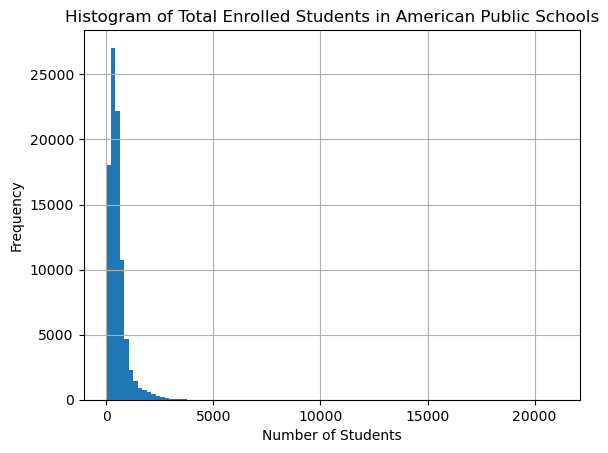

In [83]:
# Plot a histogram of Total enrolled students and check for outliers

total_enrollment = cleaned_ps_df["TOTAL"].sum()
print(f'Total number of enrolled students: {total_enrollment}')

average_school_enrollment = cleaned_ps_df["TOTAL"].mean()
print(f'Average number of enrolled students per school: {average_school_enrollment}.')

cleaned_ps_df["TOTAL"].hist(bins=100)
plt.title("Histogram of Total Enrolled Students in American Public Schools")
plt.xlabel("Number of Students")
plt.ylabel("Frequency")
plt.show()


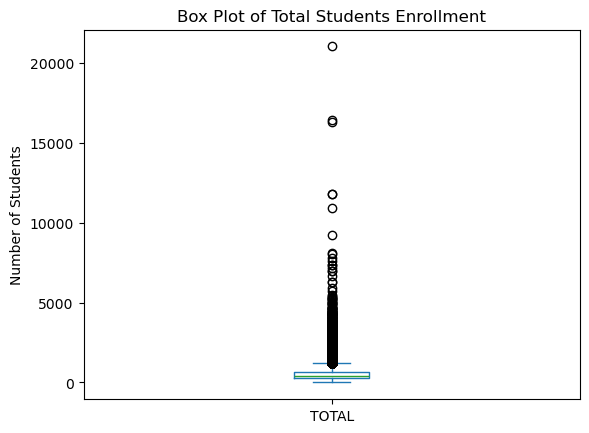

In [84]:
cleaned_ps_df["TOTAL"].plot(kind="box")
plt.title("Box Plot of Total Students Enrollment")
plt.ylabel("Number of Students")
plt.show()


Total number of FTE teachers: 3012516.2799734324
Average number of FTE teachers per school: 33.48542522062394


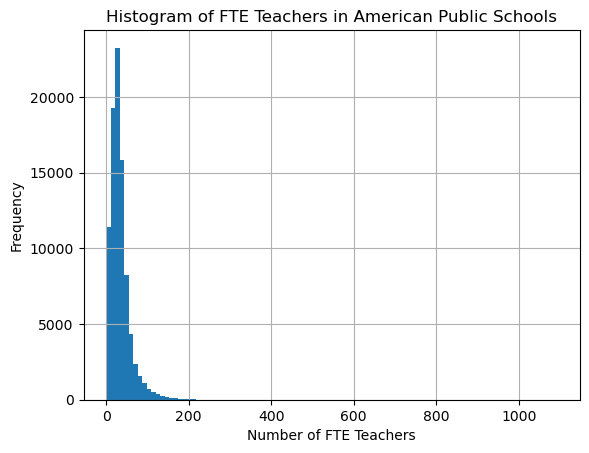

In [85]:
# Plot a histogram of Total Teachers and check for outliers

total_teachers = cleaned_ps_df["FTE"].sum()
print(f"Total number of FTE teachers: {total_teachers}")

average_teachers_per_school = cleaned_ps_df["FTE"].mean()
print(f"Average number of FTE teachers per school: {average_teachers_per_school}")

cleaned_ps_df["FTE"].hist(bins=100)
plt.title("Histogram of FTE Teachers in American Public Schools")
plt.xlabel("Number of FTE Teachers")
plt.ylabel("Frequency")
plt.show()


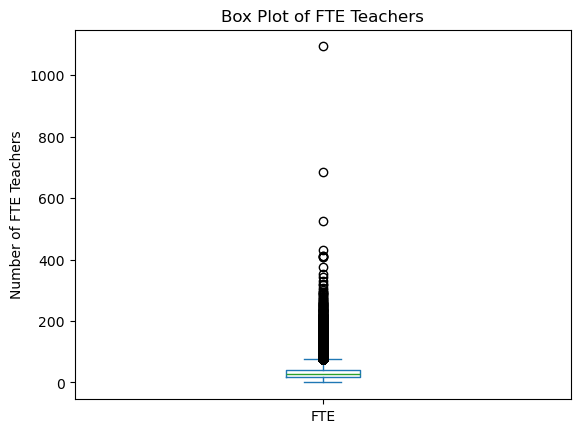

In [86]:
cleaned_ps_df["FTE"].plot(kind="box")
plt.title("Box Plot of FTE Teachers")
plt.ylabel("Number of FTE Teachers")
plt.show()


Average student-to-teacher ratio per school: 16.01112588228756


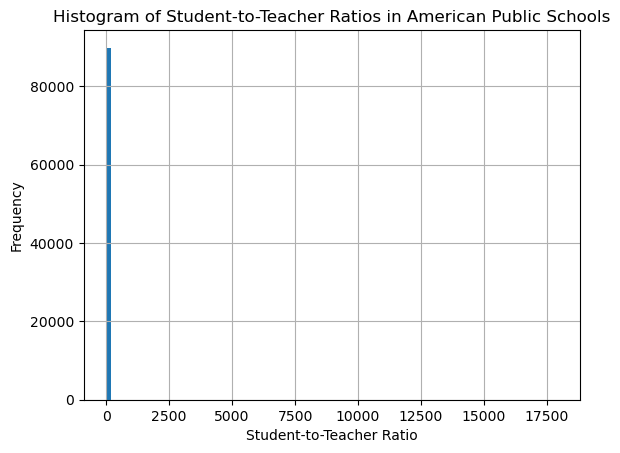

In [87]:
# Plot a histogram of Student Teacher Ratio and check for outliers

average_stuterratio = cleaned_ps_df["STUTERATIO"].mean()
print(f"Average student-to-teacher ratio per school: {average_stuterratio}")

cleaned_ps_df["STUTERATIO"].hist(bins=100)
plt.title("Histogram of Student-to-Teacher Ratios in American Public Schools")
plt.xlabel("Student-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


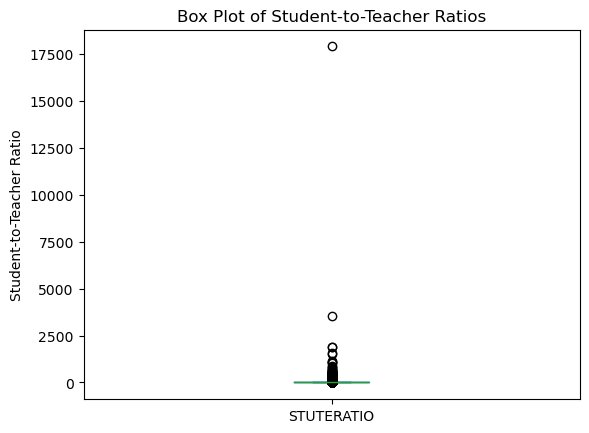

In [88]:
cleaned_ps_df["STUTERATIO"].plot(kind="box")
plt.title("Box Plot of Student-to-Teacher Ratios")
plt.ylabel("Student-to-Teacher Ratio")
plt.show()


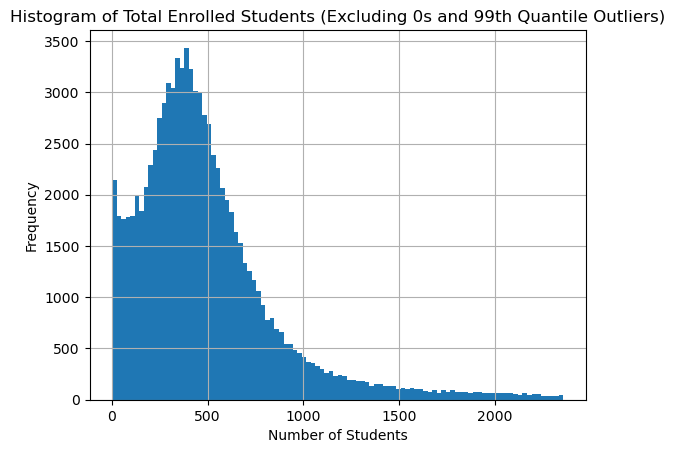

In [91]:
# Re-Plot a histogram of Total enrolled students after removing 0s and outliers above the 99th quantile

total_quantile_99 = cleaned_ps_df["TOTAL"].quantile(0.99)
total_students_condition = np.logical_and(cleaned_ps_df["TOTAL"] > 0, cleaned_ps_df["TOTAL"] < total_quantile_99)
total_students_filtered_df = cleaned_ps_df[total_students_condition]

total_students_filtered_df["TOTAL"].hist(bins=100)
plt.title("Histogram of Total Enrolled Students (Excluding 0s and 99th Quantile Outliers)")
plt.xlabel("Number of Students")
plt.ylabel("Frequency")
plt.show()


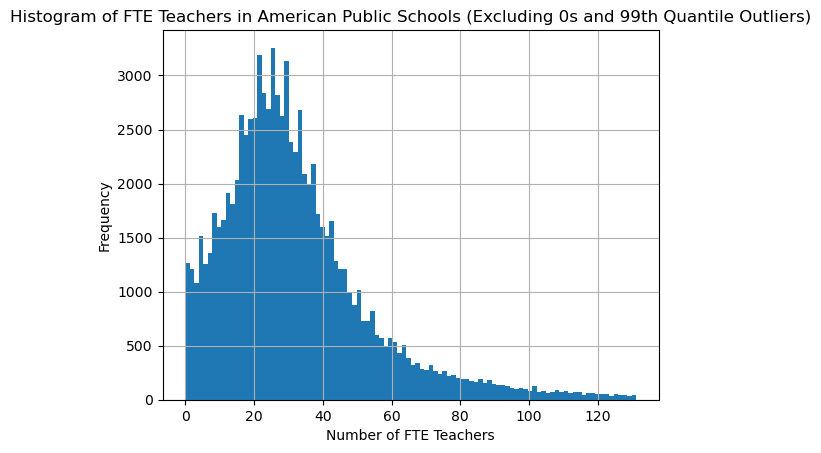

In [92]:
# Re-Plot a histogram of Total Teachers after removing 0s and outliers above the 99th quantile

fte_quantile_99 = cleaned_ps_df["FTE"].quantile(0.99)
fte_condition = np.logical_and(cleaned_ps_df["FTE"] > 0, cleaned_ps_df["FTE"] < fte_quantile_99)
fte_filtered_df = cleaned_ps_df[fte_condition]

fte_filtered_df["FTE"].hist(bins=100)
plt.title("Histogram of FTE Teachers in American Public Schools (Excluding 0s and 99th Quantile Outliers)")
plt.xlabel("Number of FTE Teachers")
plt.ylabel("Frequency")
plt.show()


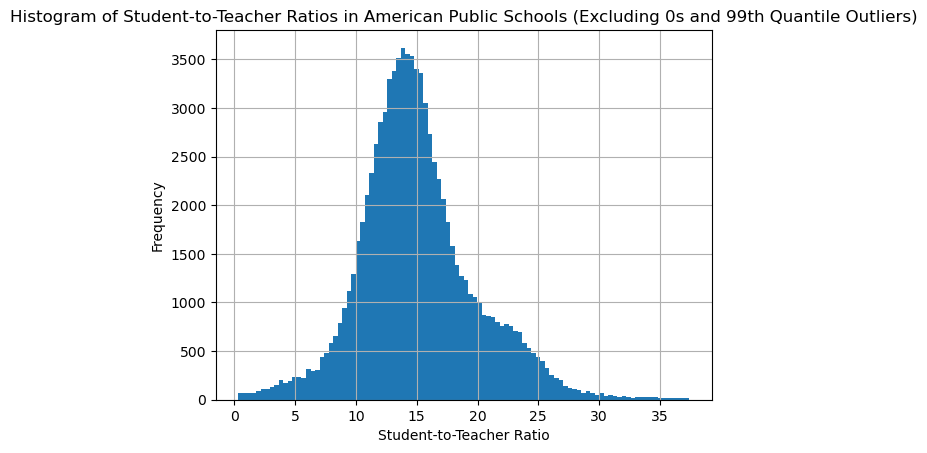

In [128]:
# Re-Plot a histogram of Student Teacher Ratio after removing 0s and outliers above the 99th quantile

ratio_quantile_99 = cleaned_ps_df["STUTERATIO"].quantile(0.99)
# stuteratio_condition = np.logical_and(cleaned_ps_df["STUTERATIO"] > 0, cleaned_ps_df["STUTERATIO"] < ratio_quantile_99)
ratio_quantile_01 = cleaned_ps_df["STUTERATIO"].quantile(0.01)
stuteratio_filtered_df = cleaned_ps_df[(cleaned_ps_df["STUTERATIO"] >= ratio_quantile_01) & (cleaned_ps_df["STUTERATIO"] <= ratio_quantile_99)]

stuteratio_filtered_df["STUTERATIO"].hist(bins=100)
plt.title("Histogram of Student-to-Teacher Ratios in American Public Schools (Excluding 0s and 99th Quantile Outliers)")
plt.xlabel("Student-to-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()


## Correlation Plot to Understand Data Relationships

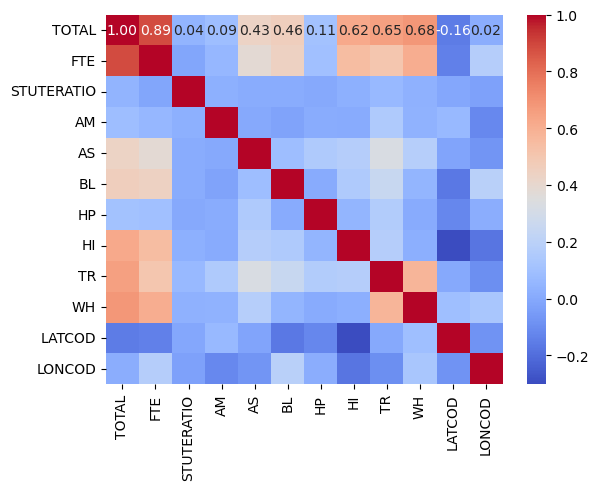

In [129]:
# Use seaborn to generate a correlation heatmap for the columns in the dataframe

corr_matrix = cleaned_ps_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm", fmt = ".2f")
plt.show()

## Geographic Plots

<function matplotlib.pyplot.show(close=None, block=None)>

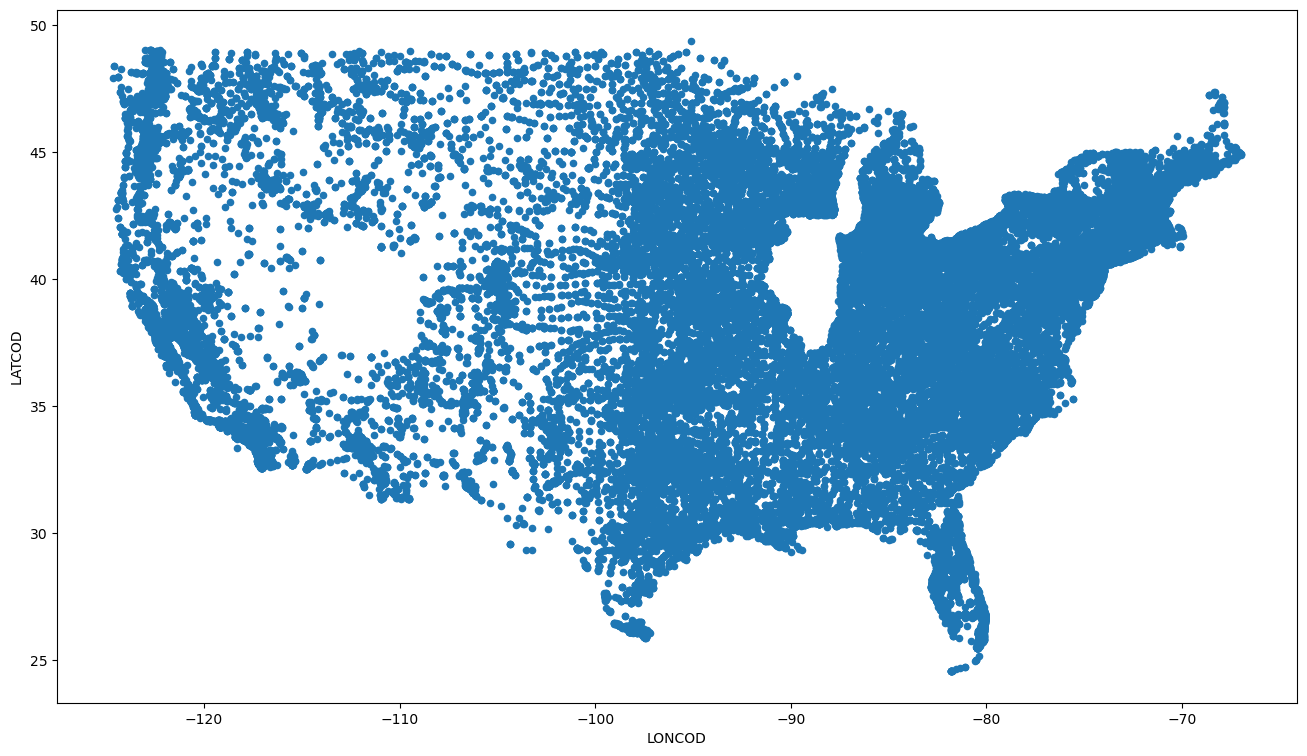

In [130]:
# Plot only schools from the 48 contiguous US states or the 50 US states (drop territories and PR)

contiguous_states = ["AL", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", 
                        "GA", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
                    	"MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", 
                    	"NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
                     	"RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", 
                     	"WV", "WI", "WY"]
contiguous_df = cleaned_ps_df[cleaned_ps_df["LSTATE"].isin(contiguous_states)]
contiguous_df.plot.scatter(x='LONCOD', y='LATCOD', figsize=(16,9))
# plt.tight_layout()
plt.show




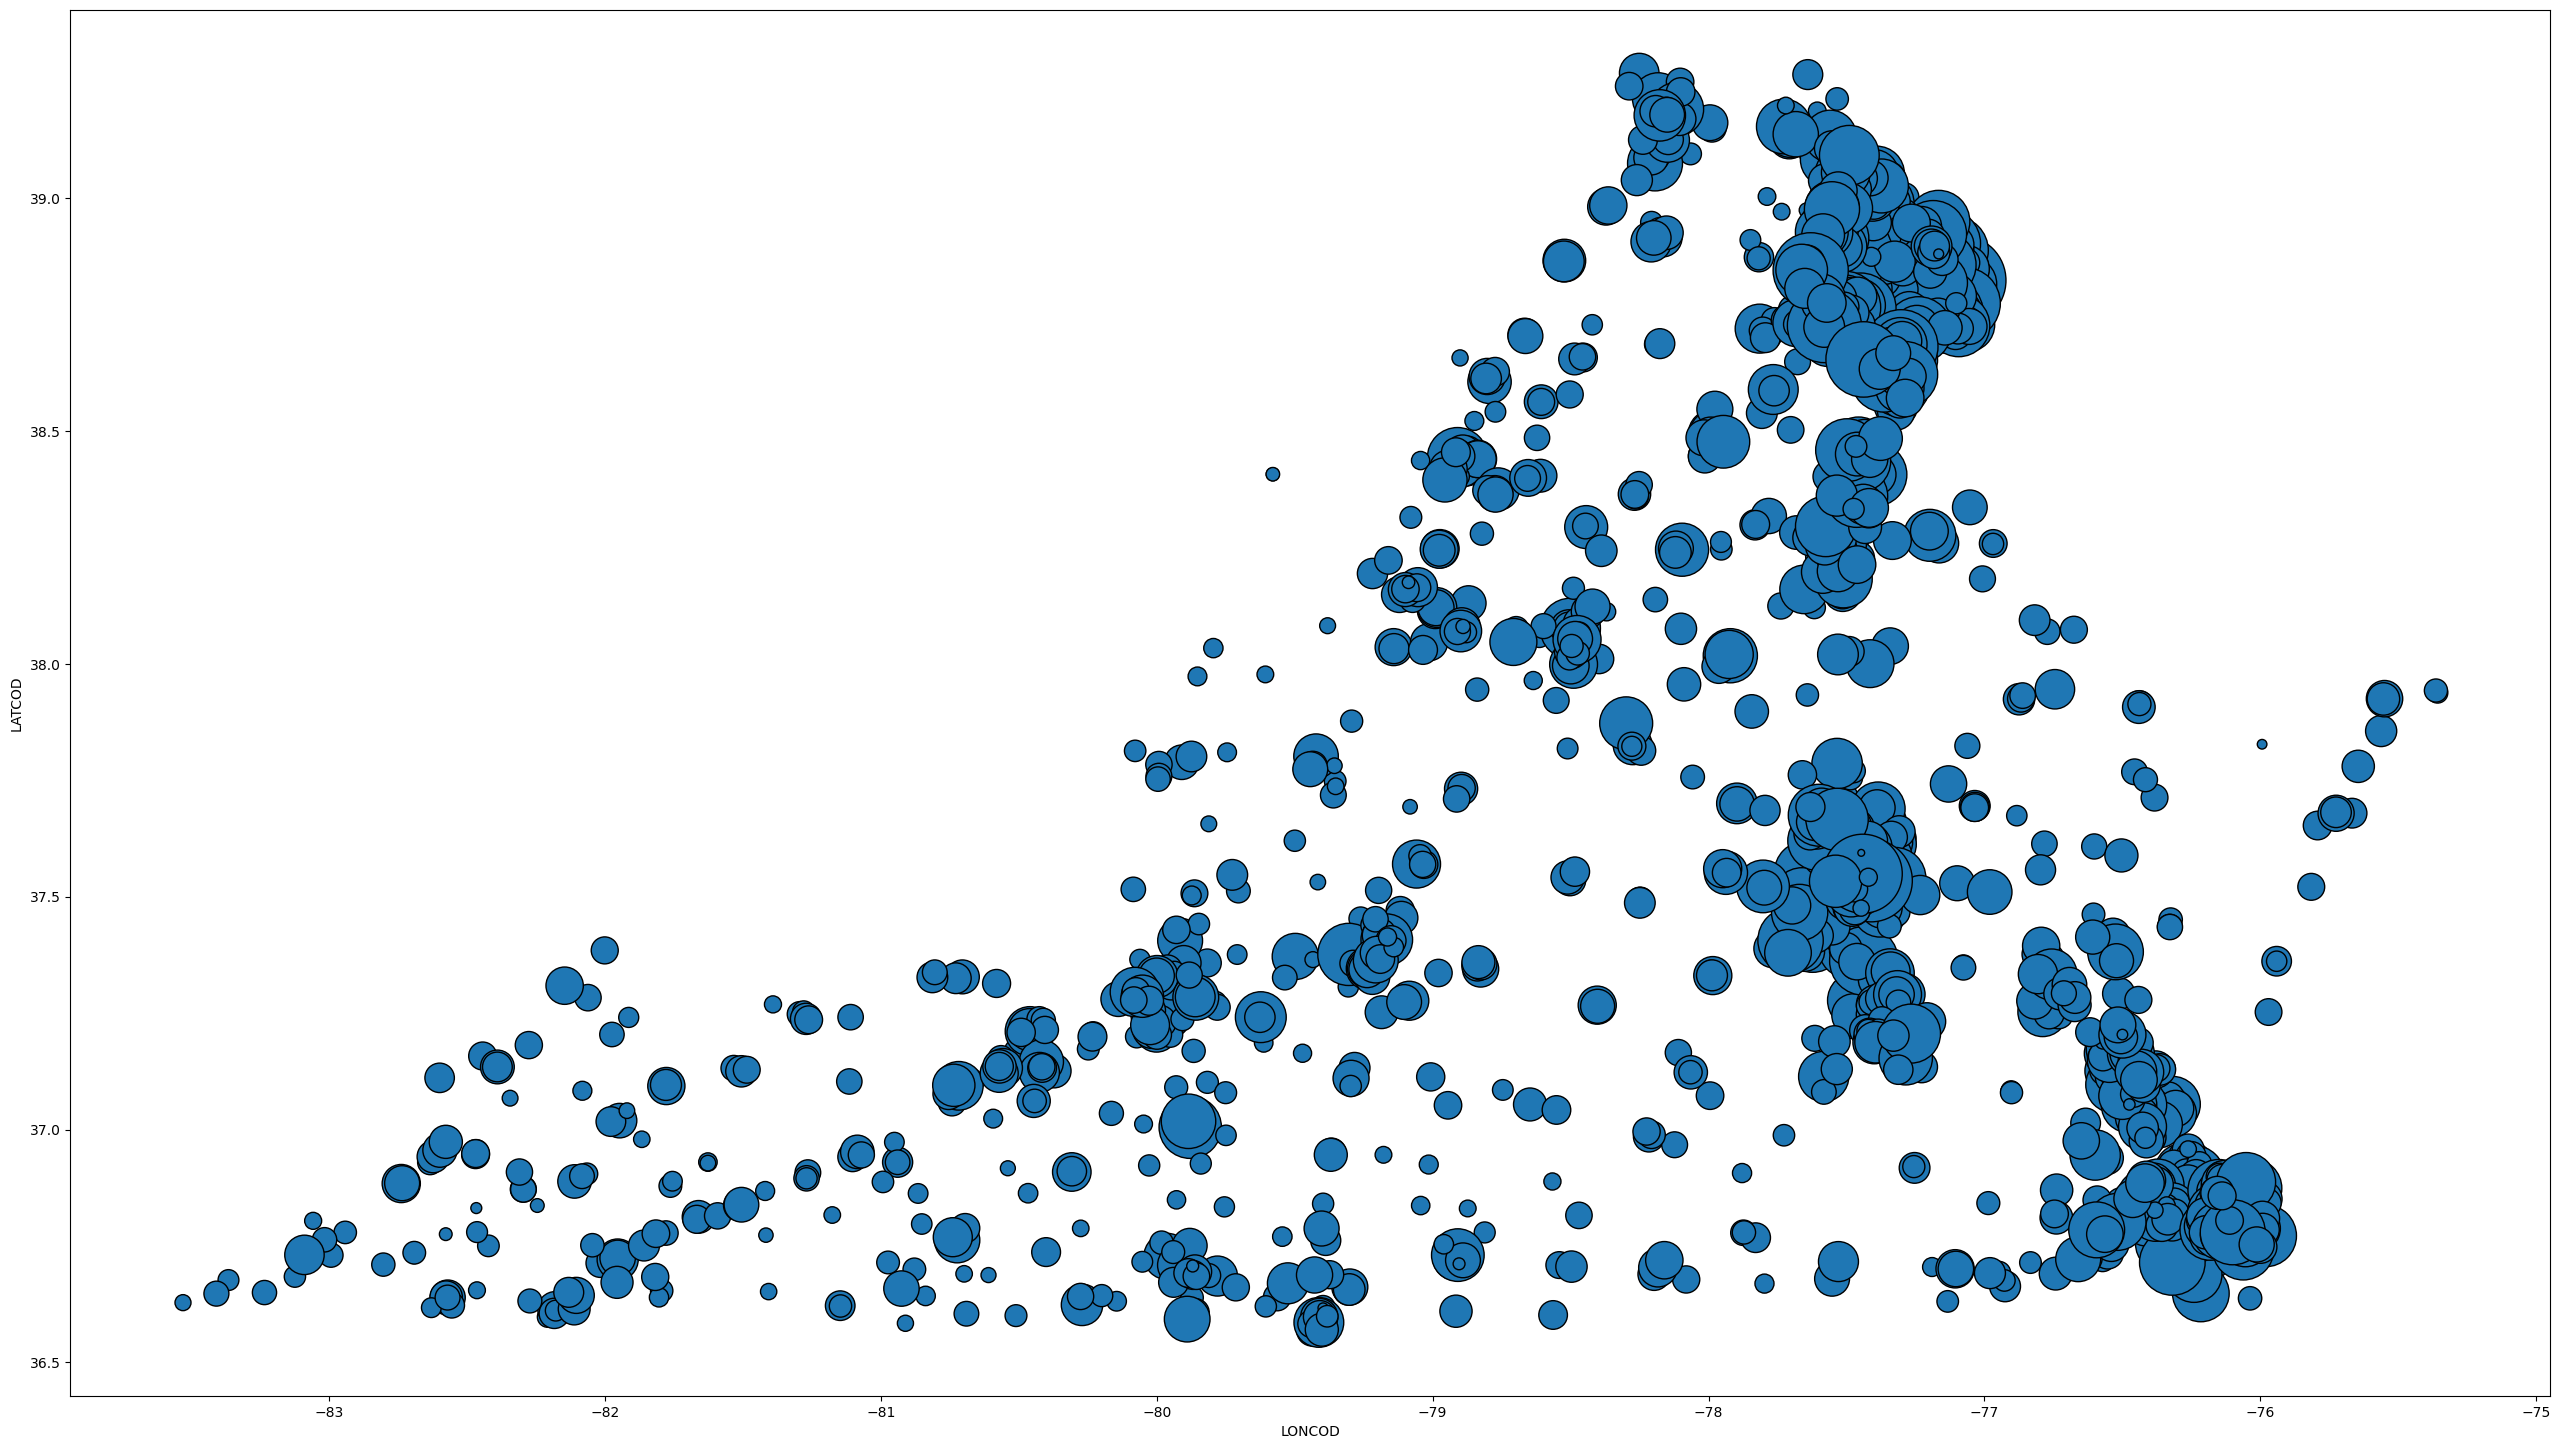

In [131]:
# Plot only schools in your state

my_state_df = cleaned_ps_df[cleaned_ps_df["LSTATE"] == "VA"]
my_state_df.plot.scatter(x='LONCOD', y='LATCOD', s='TOTAL', figsize=(32,18), edgecolor='black')
# plt.tight_layout()
plt.show()

## School Quality Analysis: Student/Teacher Ratios

In [138]:
# Use the dataframe that has filtered out the outliers in Student Teacher Ratio and group by state and get the average
# Show the highest 5 Student/Teacher ratios and lowest 5 Student/Teacher ratios as well as the average for your state

stuteratio_states = stuteratio_filtered_df.groupby("LSTATE")["STUTERATIO"].mean().reset_index()

stuteratio_state_average = pd.merge(stuteratio_states, stuteratio_filtered_df, on='LSTATE')
stuteratio_states.sort_values(by="STUTERATIO", ascending=False, inplace=True)
stuteratio_states.head()

,LSTATE,STUTERATIO
4,CA,21.311469
33,NV,18.270824
18,LA,17.646542
37,OR,17.576023
35,OH,17.163628


In [139]:
stuteratio_states.tail()

,LSTATE,STUTERATIO
26,MT,11.135061
28,ND,10.924727
30,NH,10.852994
21,ME,10.816743
52,WY,10.795406


In [141]:
# What is the mean of the Student/Teacher Ratio
stuteratio_states_mean = stuteratio_states['STUTERATIO'].mean()

14.034873196590015

In [143]:
# What is the standard deviation of the Student/Teacher Ratio
stuteratio_states_std = stuteratio_states['STUTERATIO'].std()
stuteratio_states_std

2.181063771798479

<Axes: xlabel='LSTATE'>

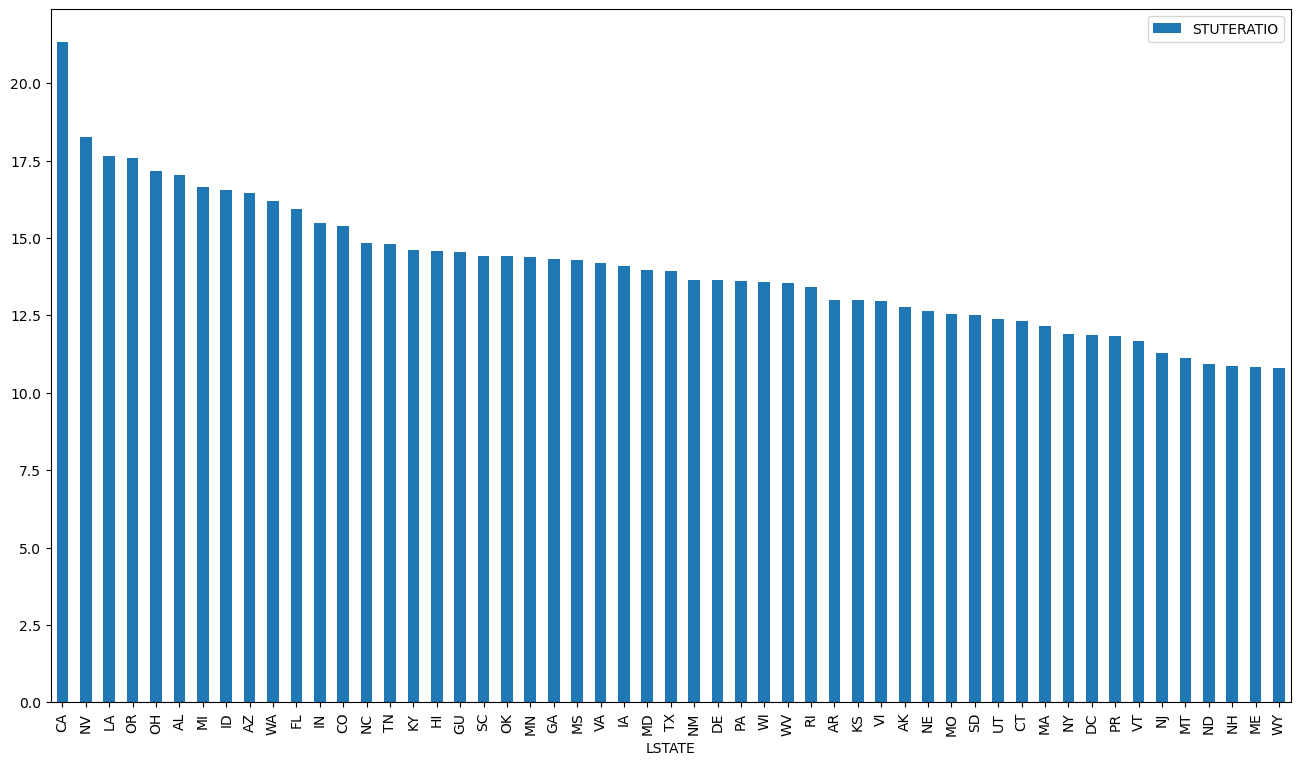

In [147]:
# Plot the states ratios in descending order
stuteratio_states.plot.bar(x='LSTATE', figsize=(16,9))

<Axes: >

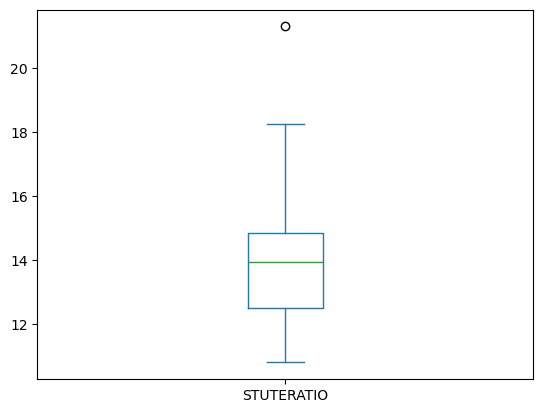

In [148]:
# Plot a boxplot of the Student/Teacher Ratios
stuteratio_states.plot.box()

<Axes: xlabel='LSTATE'>

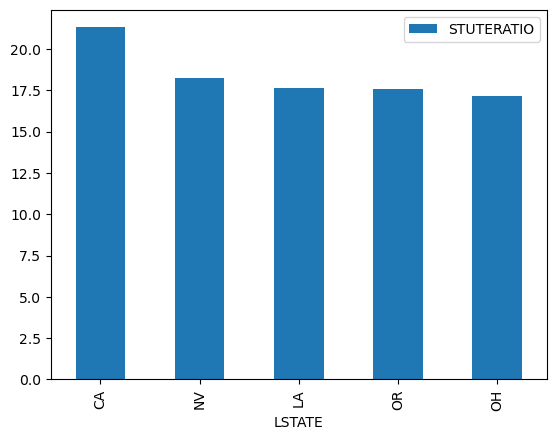

In [151]:
# List or Plot the Highest 5 states

stuteratio_states.head().plot.bar(x='LSTATE')

<Axes: xlabel='LSTATE'>

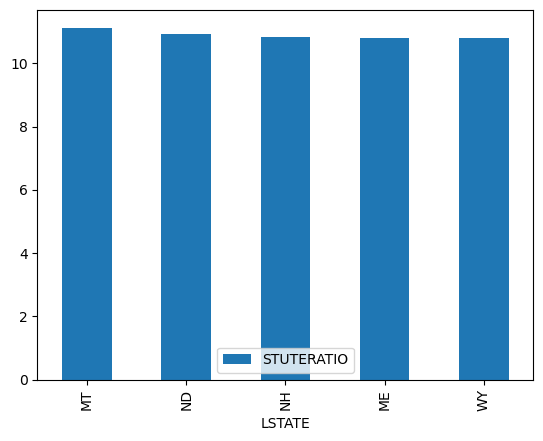

In [152]:
# List or plot the lowest 5

stuteratio_states.tail().plot.bar(x='LSTATE')

In [153]:
# Print your state's Student Teacher Ratios

stuteratio_states.loc[stuteratio_states['LSTATE']=='VA']

,LSTATE,STUTERATIO
46,VA,14.187665


## Summarize your findings from any of the analysis or plots above:
* Were there any interesting Correlations?
* How did your state compare to others?
* Would you have made any different decisions in the earlier cleaning stages after becoming more familiar with the data?
* What is going on in IL?
* What other analysis could be done with this data?

## BONUS: Generate other interesting analysis or plots

In [ ]:
# Your code below
